# Day 09. Exercise 00
# Regularization

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

## 1. Preprocessing

1. Read the file `dayofweek.csv` that you used in the previous day to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [2]:
df = pd.read_csv('../data/dayofweek.csv')
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
X = df.drop('dayofweek', axis=1)
y = df.dayofweek

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=21)

## 2. Logreg regularization

### a. Default regularization

1. Train a baseline model with the only parameters `random_state=21`, `fit_intercept=False`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model


The result of the code where you trained and evaluated the baseline model should be exactly like this (use `%%time` to get the info about how long it took to run the cell):

```
train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
```

In [5]:
logreg = LogisticRegression(fit_intercept=False, random_state=21)

In [6]:
skf = StratifiedKFold(n_splits=10)
accuracy_valid = []
for train_index, test_index in skf.split(X_train, y_train):
  logreg = logreg.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  y_trained = logreg.predict(X_train.iloc[train_index])
  y_tested = logreg.predict(X_train.iloc[test_index])
  accuracy_score_train = accuracy_score(y_train.iloc[train_index], y_trained)
  accuracy_score_test = accuracy_score(y_train.iloc[test_index], y_tested)
  accuracy_valid.append(accuracy_score_test)
  print(f'train -  {accuracy_score_train:0.5f}   |   valid -  {accuracy_score_test:0.5f}')
print(f'Average accuracy on crossval is {np.array(accuracy_valid).mean():0.5f}')
print(f'Std is {np.array(accuracy_valid).std():0.5f}')


train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943


### b. Optimizing regularization parameters

1. In the cells below try different values of penalty: `none`, `l1`, `l2` – you can change the values of solver too.

In [7]:
logreg_none = LogisticRegression(fit_intercept=False, random_state=21, penalty='none')
skf = StratifiedKFold(n_splits=10)
accuracy_valid = []
for train_index, test_index in skf.split(X_train, y_train):
  logreg_none = logreg_none.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  y_trained = logreg_none.predict(X_train.iloc[train_index])
  y_tested = logreg_none.predict(X_train.iloc[test_index])
  accuracy_score_train = accuracy_score(y_train.iloc[train_index], y_trained)
  accuracy_score_test = accuracy_score(y_train.iloc[test_index], y_tested)
  accuracy_valid.append(accuracy_score_test)
  print(f'train -  {accuracy_score_train:0.5f}   |   valid -  {accuracy_score_test:0.5f}')
print(f'Average accuracy on crossval is {np.array(accuracy_valid).mean():0.5f}')
print(f'Std is {np.array(accuracy_valid).std():0.5f}')

/opt/goinfre/einterdi/Piscine_Python_Data_Science/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/goinfre/einterdi/Piscine_Python_Data_Science/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver opt

train -  0.66529   |   valid -  0.62963
train -  0.65705   |   valid -  0.65926
train -  0.66447   |   valid -  0.57778


/opt/goinfre/einterdi/Piscine_Python_Data_Science/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/goinfre/einterdi/Piscine_Python_Data_Science/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver opt

train -  0.66529   |   valid -  0.62963
train -  0.66694   |   valid -  0.62222
train -  0.65952   |   valid -  0.57778


/opt/goinfre/einterdi/Piscine_Python_Data_Science/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/goinfre/einterdi/Piscine_Python_Data_Science/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver opt

train -  0.65045   |   valid -  0.69630
train -  0.68673   |   valid -  0.61481
train -  0.66474   |   valid -  0.62687
train -  0.65651   |   valid -  0.61940
Average accuracy on crossval is 0.62537
Std is 0.03302


/opt/goinfre/einterdi/Piscine_Python_Data_Science/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [8]:
logreg2 = LogisticRegression(fit_intercept=False, random_state=21, penalty='l2')
skf = StratifiedKFold(n_splits=10)
accuracy_valid = []
for train_index, test_index in skf.split(X_train, y_train):
  logreg2 = logreg2.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  y_trained = logreg2.predict(X_train.iloc[train_index])
  y_tested = logreg2.predict(X_train.iloc[test_index])
  accuracy_score_train = accuracy_score(y_train.iloc[train_index], y_trained)
  accuracy_score_test = accuracy_score(y_train.iloc[test_index], y_tested)
  accuracy_valid.append(accuracy_score_test)
  print(f'train -  {accuracy_score_train:0.5f}   |   valid -  {accuracy_score_test:0.5f}')
print(f'Average accuracy on crossval is {np.array(accuracy_valid).mean():0.5f}')
print(f'Std is {np.array(accuracy_valid).std():0.5f}')

train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943


In [9]:
logreg1 = LogisticRegression(fit_intercept=False, random_state=21, penalty='l1')
skf = StratifiedKFold(n_splits=10)
accuracy_valid = []
for train_index, test_index in skf.split(X_train, y_train):
  logreg1 = logreg1.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  y_trained = logreg1.predict(X_train.iloc[train_index])
  y_tested = logreg1.predict(X_train.iloc[test_index])
  accuracy_score_train = accuracy_score(y_train.iloc[train_index], y_trained)
  accuracy_score_test = accuracy_score(y_train.iloc[test_index], y_tested)
  accuracy_valid.append(accuracy_score_test)
  print(f'train -  {accuracy_score_train:0.5f}   |   valid -  {accuracy_score_test:0.5f}')
print(f'Average accuracy on crossval is {np.array(accuracy_valid).mean():0.5f}')
print(f'Std is {np.array(accuracy_valid).std():0.5f}')

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

## 3. SVM regularization

### a. Default regularization

1. Train a baseline model with the only parameters `probability=True`, `kernel='linear'`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [ ]:
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21))
skf = StratifiedKFold(n_splits=10)
accuracy_valid = []
for train_index, test_index in skf.split(X_train, y_train):
  clf.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  y_trained = clf.predict(X_train.iloc[train_index])
  y_tested = clf.predict(X_train.iloc[test_index])
  accuracy_score_train = accuracy_score(y_train.iloc[train_index], y_trained)
  accuracy_score_test = accuracy_score(y_train.iloc[test_index], y_tested)
  accuracy_valid.append(accuracy_score_test)
  print(f'train -  {accuracy_score_train:0.5f}   |   valid -  {accuracy_score_test:0.5f}')
print(f'Average accuracy on crossval is {np.array(accuracy_valid).mean():0.5f}')
print(f'Std is {np.array(accuracy_valid).std():0.5f}')

train -  0.59192   |   valid -  0.57037
train -  0.58945   |   valid -  0.57037
train -  0.57955   |   valid -  0.49630
train -  0.61418   |   valid -  0.60741
train -  0.58945   |   valid -  0.52593
train -  0.58450   |   valid -  0.56296
train -  0.58945   |   valid -  0.62963
train -  0.61995   |   valid -  0.55556
train -  0.61367   |   valid -  0.58955
train -  0.61779   |   valid -  0.59701
Average accuracy on crossval is 0.57051
Std is 0.03701


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `C`.

In [ ]:
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21, C=4))
skf = StratifiedKFold(n_splits=10)
accuracy_valid = []
for train_index, test_index in skf.split(X_train, y_train):
  clf.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  y_trained = clf.predict(X_train.iloc[train_index])
  y_tested = clf.predict(X_train.iloc[test_index])
  accuracy_score_train = accuracy_score(y_train.iloc[train_index], y_trained)
  accuracy_score_test = accuracy_score(y_train.iloc[test_index], y_tested)
  accuracy_valid.append(accuracy_score_test)
  print(f'train -  {accuracy_score_train:0.5f}   |   valid -  {accuracy_score_test:0.5f}')
print(f'Average accuracy on crossval is {np.array(accuracy_valid).mean():0.5f}')
print(f'Std is {np.array(accuracy_valid).std():0.5f}')

train -  0.60181   |   valid -  0.57778
train -  0.60429   |   valid -  0.60000
train -  0.58450   |   valid -  0.50370
train -  0.60923   |   valid -  0.61481
train -  0.58615   |   valid -  0.53333
train -  0.59439   |   valid -  0.54815
train -  0.58697   |   valid -  0.62963
train -  0.61913   |   valid -  0.57037
train -  0.61532   |   valid -  0.59701
train -  0.60791   |   valid -  0.59701
Average accuracy on crossval is 0.57718
Std is 0.03699


In [ ]:
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21, C=40))
skf = StratifiedKFold(n_splits=10)
accuracy_valid = []
for train_index, test_index in skf.split(X_train, y_train):
  clf.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  y_trained = clf.predict(X_train.iloc[train_index])
  y_tested = clf.predict(X_train.iloc[test_index])
  accuracy_score_train = accuracy_score(y_train.iloc[train_index], y_trained)
  accuracy_score_test = accuracy_score(y_train.iloc[test_index], y_tested)
  accuracy_valid.append(accuracy_score_test)
  print(f'train -  {accuracy_score_train:0.5f}   |   valid -  {accuracy_score_test:0.5f}')
print(f'Average accuracy on crossval is {np.array(accuracy_valid).mean():0.5f}')
print(f'Std is {np.array(accuracy_valid).std():0.5f}')

train -  0.58862   |   valid -  0.58519
train -  0.60758   |   valid -  0.60000
train -  0.58368   |   valid -  0.46667
train -  0.61500   |   valid -  0.59259
train -  0.58862   |   valid -  0.56296
train -  0.60841   |   valid -  0.55556
train -  0.58285   |   valid -  0.62963
train -  0.60758   |   valid -  0.55556
train -  0.62026   |   valid -  0.59701
train -  0.58814   |   valid -  0.56716
Average accuracy on crossval is 0.57123
Std is 0.04131


In [ ]:
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21, C=100))
skf = StratifiedKFold(n_splits=10)
accuracy_valid = []
for train_index, test_index in skf.split(X_train, y_train):
  clf.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  y_trained = clf.predict(X_train.iloc[train_index])
  y_tested = clf.predict(X_train.iloc[test_index])
  accuracy_score_train = accuracy_score(y_train.iloc[train_index], y_trained)
  accuracy_score_test = accuracy_score(y_train.iloc[test_index], y_tested)
  accuracy_valid.append(accuracy_score_test)
  print(f'train -  {accuracy_score_train:0.5f}   |   valid -  {accuracy_score_test:0.5f}')
print(f'Average accuracy on crossval is {np.array(accuracy_valid).mean():0.5f}')
print(f'Std is {np.array(accuracy_valid).std():0.5f}')

train -  0.60429   |   valid -  0.58519
train -  0.58780   |   valid -  0.57037
train -  0.60264   |   valid -  0.51111
train -  0.58368   |   valid -  0.60000
train -  0.60511   |   valid -  0.56296
train -  0.63397   |   valid -  0.56296
train -  0.59439   |   valid -  0.63704
train -  0.59439   |   valid -  0.57778
train -  0.62356   |   valid -  0.61194
train -  0.60214   |   valid -  0.57463
Average accuracy on crossval is 0.57940
Std is 0.03186


## 4. Tree

### a. Default regularization

1. Train a baseline model with the only parameter `max_depth=10` and `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [ ]:
parameters = {
    'max_depth': [1, 5, 10, 15, 25, 30]
}
tD = tree.DecisionTreeClassifier(random_state=21)
clf = GridSearchCV(tD, parameters)
skf = StratifiedKFold(n_splits=10)
accuracy_valid = []
for train_index, test_index in skf.split(X_train, y_train):
  clf.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  y_trained = clf.predict(X_train.iloc[train_index])
  y_tested = clf.predict(X_train.iloc[test_index])
  accuracy_score_train = accuracy_score(y_train.iloc[train_index], y_trained)
  accuracy_score_test = accuracy_score(y_train.iloc[test_index], y_tested)
  accuracy_valid.append(accuracy_score_test)
  print(f'train -  {accuracy_score_train:0.5f}   |   valid -  {accuracy_score_test:0.5f}')
print(f'Average accuracy on crossval is {np.array(accuracy_valid).mean():0.5f}')
print(f'Std is {np.array(accuracy_valid).std():0.5f}')
clf.best_params_

train -  1.00000   |   valid -  0.85926
train -  1.00000   |   valid -  0.91852
train -  0.99918   |   valid -  0.86667
train -  1.00000   |   valid -  0.91111
train -  0.99918   |   valid -  0.88889
train -  0.99835   |   valid -  0.85185
train -  1.00000   |   valid -  0.92593
train -  1.00000   |   valid -  0.88148
train -  1.00000   |   valid -  0.88060
train -  1.00000   |   valid -  0.88060
Average accuracy on crossval is 0.88649
Std is 0.02371


{'max_depth': 25}

### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `max_depth`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

## 5. Random forest

### a. Default regularization

1. Train a baseline model with the only parameters `n_estimators=50`, `max_depth=14`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [ ]:
X = df.drop('dayofweek', axis=1)
y = df.dayofweek

parameters = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [1, 5, 10, 14, 25, 30]
}
random_forest_model = RandomForestClassifier(random_state=21)
clf = GridSearchCV(random_forest_model, parameters, scoring='accuracy', n_jobs=-1)
skf = StratifiedKFold(n_splits=10)
accuracy_valid = []
for train_index, test_index in skf.split(X_train, y_train):
  clf.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  y_trained = clf.predict(X_train.iloc[train_index])
  y_tested = clf.predict(X_train.iloc[test_index])
  accuracy_score_train = accuracy_score(y_train.iloc[train_index], y_trained)
  accuracy_score_test = accuracy_score(y_train.iloc[test_index], y_tested)
  accuracy_valid.append(accuracy_score_test)
  print(f'train -  {accuracy_score_train:0.5f}   |   valid -  {accuracy_score_test:0.5f}')
print(f'Average accuracy on crossval is {np.array(accuracy_valid).mean():0.5f}')
print(f'Std is {np.array(accuracy_valid).std():0.5f}')
clf.best_params_

train -  1.00000   |   valid -  0.90370
train -  1.00000   |   valid -  0.95556
train -  0.99918   |   valid -  0.89630
train -  1.00000   |   valid -  0.93333
train -  0.99835   |   valid -  0.92593
train -  0.99918   |   valid -  0.89630
train -  1.00000   |   valid -  0.92593
train -  1.00000   |   valid -  0.90370
train -  1.00000   |   valid -  0.92537
train -  0.99918   |   valid -  0.88806
Average accuracy on crossval is 0.91542
Std is 0.02002


{'max_depth': 30, 'n_estimators': 50}

### b. Optimizing regularization parameters

1. In the new cells try different values of the parameters `max_depth` and `n_estimators`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

## 6. Predictions

1. Choose the best model and use it to make predictions for the test dataset.
2. Calculate the final accuracy.
3. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your test dataset).
4. Save the model.

As we saw above, the best results come from random forest model<br>
Parameters: n_estimators=50, max_depth=30

In [ ]:
random_forest_model = RandomForestClassifier(random_state=21, n_estimators=50, max_depth=30)
random_forest_model.fit(X_train, y_train)
y_after_test = random_forest_model.predict(X_test)
accuracy_score(y_test, y_after_test)

0.9289940828402367

In [ ]:
# y_after_test

array([1, 5, 6, 3, 2, 1, 5, 5, 6, 6, 5, 6, 3, 0, 3, 3, 5, 3, 3, 6, 3, 4,
       3, 3, 6, 1, 5, 3, 1, 6, 6, 5, 6, 6, 3, 5, 6, 0, 1, 6, 6, 5, 5, 1,
       6, 1, 6, 3, 2, 1, 1, 5, 5, 4, 6, 6, 1, 6, 0, 3, 1, 3, 1, 1, 4, 4,
       2, 0, 3, 6, 5, 6, 5, 2, 5, 5, 4, 0, 5, 6, 1, 0, 1, 3, 6, 5, 5, 6,
       5, 3, 6, 3, 4, 1, 3, 6, 3, 6, 4, 3, 3, 0, 2, 1, 6, 0, 0, 4, 3, 3,
       4, 1, 5, 0, 6, 5, 5, 1, 5, 3, 6, 3, 3, 0, 0, 6, 4, 6, 5, 6, 3, 5,
       6, 3, 2, 6, 5, 6, 5, 4, 6, 1, 6, 6, 5, 3, 1, 1, 3, 1, 1, 3, 1, 0,
       3, 3, 5, 6, 2, 5, 0, 6, 2, 3, 5, 3, 3, 0, 3, 3, 3, 6, 3, 5, 0, 3,
       5, 3, 3, 5, 3, 1, 5, 2, 3, 0, 3, 1, 2, 3, 0, 2, 6, 6, 5, 5, 2, 2,
       1, 6, 6, 5, 5, 6, 3, 6, 2, 5, 2, 6, 1, 3, 1, 5, 4, 4, 1, 3, 5, 3,
       2, 5, 1, 0, 3, 3, 1, 3, 1, 6, 6, 6, 6, 4, 6, 2, 1, 4, 6, 0, 1, 3,
       5, 6, 6, 3, 5, 2, 5, 6, 3, 2, 3, 4, 5, 6, 3, 6, 3, 1, 1, 3, 1, 5,
       6, 6, 6, 4, 3, 3, 2, 3, 6, 3, 1, 6, 1, 3, 3, 3, 5, 3, 0, 3, 2, 6,
       2, 6, 6, 1, 5, 4, 3, 6, 0, 3, 6, 1, 3, 2, 6,

In [ ]:
# from sklearn.metrics import mean_squared_error
# error = []
# for i in range(len(list(y_test))):
#     err = (y_after_test[i] - list(y_test)[i]) ** 2
#     err_param = err / len(list(y_test))
#     error.append(err_param)
#     print(err_param, y_after_test[i], list(y_test)[i])
# max_error = max(error)
# print(f'max error: {max_error}')
# for i in range(len(list(y_test))):
#     err = (y_after_test[i] - list(y_test)[i]) ** 2
#     err_param = err / len(list(y_test))
#     if err_param == max_error:
#         print(f'Max err is for {list(y_test)[i]} day')
#         break

0.0 1 1
0.0 5 5
0.0 6 6
0.0 3 3
0.0 2 2
0.0 1 1
0.0 5 5
0.0 5 5
0.0 6 6
0.0 6 6
0.0 5 5
0.0 6 6
0.0 3 3
0.0029585798816568047 0 1
0.0 3 3
0.0 3 3
0.0 5 5
0.0 3 3
0.0 3 3
0.0 6 6
0.0 3 3
0.0 4 4
0.0 3 3
0.0 3 3
0.0 6 6
0.0 1 1
0.0 5 5
0.0 3 3
0.0 1 1
0.0029585798816568047 6 5
0.0 6 6
0.0029585798816568047 5 4
0.0 6 6
0.0 6 6
0.0 3 3
0.0 5 5
0.0 6 6
0.026627218934911243 0 3
0.0 1 1
0.0 6 6
0.0 6 6
0.0 5 5
0.0 5 5
0.0 1 1
0.10650887573964497 6 0
0.0 1 1
0.0 6 6
0.0 3 3
0.0 2 2
0.0 1 1
0.0 1 1
0.0 5 5
0.0 5 5
0.0 4 4
0.0 6 6
0.0 6 6
0.0 1 1
0.0 6 6
0.0 0 0
0.0 3 3
0.0 1 1
0.0 3 3
0.0 1 1
0.0 1 1
0.047337278106508875 4 0
0.0 4 4
0.0 2 2
0.0 0 0
0.0 3 3
0.0 6 6
0.0 5 5
0.0 6 6
0.0 5 5
0.0 2 2
0.0 5 5
0.0 5 5
0.0 4 4
0.0 0 0
0.0 5 5
0.0 6 6
0.0 1 1
0.0029585798816568047 0 1
0.0 1 1
0.0 3 3
0.0 6 6
0.047337278106508875 5 1
0.0 5 5
0.0 6 6
0.0 5 5
0.0 3 3
0.0 6 6
0.0 3 3
0.0 4 4
0.0 1 1
0.0 3 3
0.0 6 6
0.0 3 3
0.0 6 6
0.0 4 4
0.0 3 3
0.0 3 3
0.0 0 0
0.0 2 2
0.0 1 1
0.0 6 6
0.0 0 0
0.0 0 0
0.0 4

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

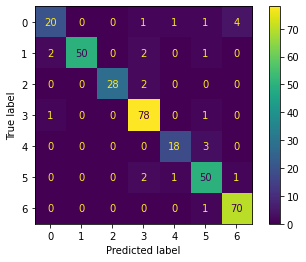

In [ ]:
cm = confusion_matrix(y_test, y_after_test, labels=random_forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=random_forest_model.classes_)
disp.plot()
plt.show()

In [ ]:
import pickle
filename = 'model_random_tree.sav'
pickle.dump(random_forest_model, open(filename, 'wb'))